<a href="https://colab.research.google.com/github/GuraTom9/NLP100/blob/main/NLP100_30_39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第4章　形態素解析

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "drive/My Drive/NLP100"

Mounted at /content/drive/
/content/drive/My Drive/NLP100


In [ ]:
# MeCabインストール
! apt install mecab libmecab-dev mecab-ipadic-utf8
! pip install unidic-lite

In [ ]:
# 形態素解析　実行
! mecab neko.txt -o neko.txt.mecab

In [ ]:
# 確認
! head -30 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント


##30. 形態素解析結果の読み込み

In [ ]:
with open("neko.txt.mecab") as f:
    text_dict = []
    sentence_dict = []
    for line in f.readlines():
        if line == "\n":
            continue
        elif line != "EOS\n":
            node = line.split("\t")
            features = node[1].split(",")

            if node[0] == "":
                continue
            
            word_dict = {"surface":node[0], "base":features[6], "pos":features[0], "pos1":features[1]}
            sentence_dict.append(word_dict)
        
        elif len(sentence_dict) != 0:
            text_dict.append(sentence_dict)
            sentence_dict = []

for i in text_dict[0]:
    print(i)
print()
for i in text_dict[1]:
    print(i)
print()

{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}



##31. 動詞

In [ ]:
verb_surface_set = set()

for sentence in text_dict:
    for word in sentence:
        if word["pos"] == "動詞":
            verb_surface_set.add(word["surface"])
            
print(verb_surface_set)

{'流れれ', '敲い', '光らし', '臨ま', '縛せ', '喩える', '落とし', '律する', '浸ら', '通せ', '住ん', '話せる', '廻し', '持ち', '真面目くさっ', 'してやり', 'あきれ返っ', '習お', '恐れ入ら', '窶し', '聞き合せ', '片づか', '飛ばし', 'たたく', '飛び込め', '己惚れ', '動かす', '聞い', '尋ね', 'やむ', 'こびりつい', '抜け', 'ふる', 'しゃがん', '尖', '詰め込む', '退', '立ち上がる', '眩む', '綻び', '鳴っ', '好か', '切る', '似合う', '飛び込ま', '恐れ入る', '依', '忍ん', 'ござら', '去っ', 'たた', 'だす', '巡り', '参る', '刺し', '訴える', '引き続い', '鳴い', '喜ぶ', '律す', '祭り', '下さる', '逐っ', 'ほのめかし', '驚きゃ', 'ござっ', '穿つ', '飛びつく', 'かよう', '映ずる', '取り残さ', 'すて', '押し返し', '蹴返す', '擦', 'やってのける', '書きゃ', '仰向き', '感じ入っ', '遺す', '取り出し', '向ける', '救い出し', '消し', '及び', '見習う', 'むい', 'ふかし', '告げる', '呑ま', '及ぼし', '立ちすくん', 'なやん', '衝く', '抱え込ん', '考え付い', '召し上がれ', '娶る', '飾る', '小突き', 'つかっ', '奏し', '続け', '痛み', '沈ん', '引き返し', '借', '愛す', '取っ', '落ち着く', '取り払わ', '追払っ', 'よみ', '追い出し', '押し', 'わす', '酬い', 'つい', '愛し', '願お', '取り留め', '遂げ', '甘える', '逆らわ', '脱ぎ', '照り付け', '遺し', '砕けよ', '驚か', '頬張っ', '縮まる', 'なぐさみ', '逢っ', '行きゃ', '尋ねる', '呼ばわり', '受け取れ', '干', '割い', '追払わ', '勝れ', '取り殺し', '飛び込む', '蒙り', '掘っ', '乞わ', '作り', '響

##32. 動詞の基本形

In [ ]:
verb_base_set = set()

for sentence in text_dict:
    for word in sentence:
        if word["pos"] == "動詞":
            verb_base_set.add(word["base"])
            
print(verb_base_set)

{'糺す', 'すべる', '喩える', '律する', '話せる', '図る', '浮かす', '取り留める', 'たぎる', 'たたく', '留る', '動かす', '刺す', 'やむ', 'ふる', '詰め込む', '窘める', '立ち上がる', '眩む', '寝過ごす', '比す', 'ふく', '手こずる', '悟れる', '切る', '似合う', '恐れ入る', 'たくる', 'だす', '参る', '訴える', 'のめる', '喜ぶ', '律す', '下さる', '申し合せる', 'もとめる', '穿つ', 'すます', '静まり返る', '飛びつく', 'かよう', 'しごく', '映ずる', '蹴返す', 'やってのける', '開け放つ', '躍り込む', 'ぐれる', '遺す', 'むき出す', '向ける', '煎じる', 'くらべる', 'つつむ', '告げる', '見習う', '息む', '待たす', 'つかむ', '衝く', '祭る', '浚う', '取り極める', '娶る', 'ねじ上げる', '飾る', '巡る', '愛す', '落ち着く', '受け取る', '甘える', '伝う', '制す', 'はねる', 'どける', 'いらせられる', 'なく', '縮まる', '祈る', '尋ねる', '狭める', '畳み込む', '飛び込む', '突き立てる', '手伝う', '澄ます', '吃る', 'ゆう', '変る', '坐する', 'しる', '持て余す', '誇る', '焚ける', '研ぐ', '試す', '察する', '挙げる', 'いたす', 'きかかる', '陥る', 'つまる', '具える', '潰せる', '遂げる', '稼ぐ', '広げる', '心掛ける', '枯れる', '殺す', '近付く', 'どく', 'かざる', '背く', 'こらす', '終る', 'あらう', '舞い戻る', 'つづく', '見やる', '満ちる', '兼ねる', '越える', '討つ', '盛る', '見出す', '奏する', '生かす', 'ぬく', '使う', '見かねる', 'きる', '倦む', 'つくろう', '振り撒く', '隣る', '伺う', '折る', 'やむを得る', '落ちる', '捕る', 'かわす', '濁る', 

##33. 「AのB」

In [ ]:
A_B = []

for sentence in text_dict:
    for i, word in enumerate(sentence):
        if (word["surface"] == "の") & (i != 0) & (i != len(sentence)-1):
            if (sentence[i-1]["pos"] == "名詞") & (sentence[i+1]["pos"] == "名詞"):
                A_B.append(sentence[i-1]["surface"] + "の" + sentence[i+1]["surface"])

print(A_B)

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔']


##34. 名詞の連接

In [ ]:
noun_connection = []

for sentence in text_dict:
    for i, word in enumerate(sentence):
        if (word["pos"] == "名詞") & ((i==0) | (sentence[i-1]["pos"]!="名詞")):
            nouns = ""
            cnt = 0

            while (i+cnt < len(sentence)-1) & (sentence[i+cnt]["pos"]=="名詞"):
                nouns += sentence[i+cnt]["surface"]
                cnt += 1
            
            if cnt >= 2:
                noun_connection.append(nouns)

print(noun_connection)

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '平生吾輩', '馬鹿野郎', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな日', '二時頃', '昼飯後', '運動かたがた', '一本一本', '杉垣', '前後不覚', '庭内', '忍び入り', '黒猫', '柔毛', '出ずるよう', '猫中', '杉垣', '二三枚', 'ぐべき力', '険呑', '時吾輩', '言葉付', '誰だい', '乱暴猫', '同盟敬遠主義', '一体車屋', '大分強そう', 'おれなんざ', '茶畠', '箆棒め', 'あらら', 'その後吾輩', '車屋相当', '不徳事件', '日例', '茶畠', '何匹', '近付', '事彼', '手柄話', '欠所', '三

##35. 単語の出現頻度

In [ ]:
from collections import defaultdict

word_freq = defaultdict(int)
for sentence in text_dict:
  for word in sentence:
    if word["pos"] != "記号":
      word_freq[word["base"]] += 1
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print(word_freq)

[('の', 9194), ('て', 6848), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5972), ('と', 5508), ('が', 5337), ('た', 4267), ('する', 3657), ('ない', 3052), ('も', 2479), ('ある', 2320), ('*\n', 2191), ('で', 2084), ('から', 2031), ('いる', 1777), ('ん', 1568), ('か', 1529), ('云う', 1408), ('事', 1207), ('です', 1164), ('ます', 1146), ('なる', 1120), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('ぬ', 719), ('よう', 696), ('見る', 675), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('思う', 502), ('よ', 502), ('吾輩', 481), ('来る', 460), ('れる', 450), ('じゃ', 450), ('これ', 414), ('さ', 410), ('それ', 381), ('聞く', 347), ('でも', 346), ('時', 345), ('行く', 340), ('出来る', 324), ('三', 319), ('出る', 317), ('な', 317), ('まで', 313), ('ところ', 313), ('方', 312), ('やる', 311), ('二', 303), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), ('ごとし', 261), ('さん', 260), ('気', 250), ('猫', 248), ('だけ', 246), ('たい', 241), ('また

##36. 頻度上位10語

In [ ]:
! pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=2812bb737cac5e5571125ab7d038e4ca293f5e83dbc48474840aa661aa93a70b
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


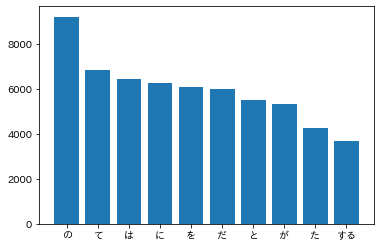

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

word_freq_10 = dict(word_freq[:10])

plt.bar(word_freq_10.keys(), word_freq_10.values())
plt.show()

##37. 「猫」と共起頻度の高い上位10語

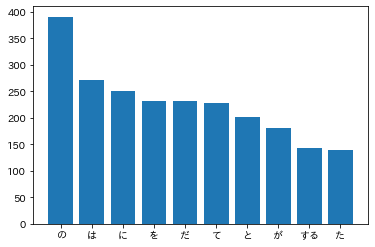

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

from collections import defaultdict

cat_coocurrence_freq = defaultdict(int)

for sentence in text_dict:
    if "猫" in [word["surface"] for word in sentence]:
        for word in sentence:
            if word["pos"] != "記号":
                cat_coocurrence_freq[word["base"]] += 1

cat_coocurrence_freq = sorted(cat_coocurrence_freq.items(), key=lambda x: x[1], reverse=True)

cat_coocurrence_freq_10 = dict(cat_coocurrence_freq[:11])
del cat_coocurrence_freq_10["猫"]

plt.bar(cat_coocurrence_freq_10.keys(), cat_coocurrence_freq_10.values())
plt.show()

##38.ヒストグラム

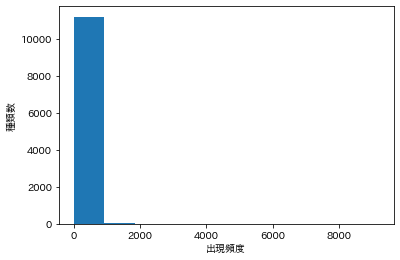

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

word_freq = dict(word_freq)

plt.hist(word_freq.values())
plt.xlabel("出現頻度")
plt.ylabel("種類数")
plt.show()

##39.Zipfの法則

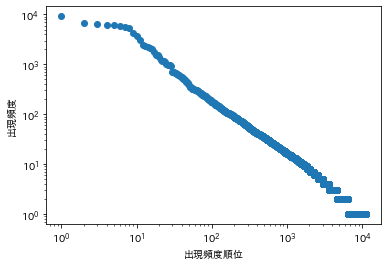

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

word_freq_rank = range(1, len(word_freq)+1)
word_freq = dict(word_freq)

plt.scatter(word_freq_rank, word_freq.values())
plt.xscale('log')
plt.yscale('log')
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.show()